## **Overview**

The goal of this project is to detect fraudulent credit card transactions with high accuracy using anomaly detection algorithms.

**✔ 1. Data Extraction and Cleaning**
* Loading Data 
* dealing with Null values and duplicates

**✔ 2. EDA (Exploratory Data Analysis)**
* overview of data and understanding data using statistics 
* visualizing distributions using scatter plots and histograms 

**✔ 3. Data Preprocessing and Feature Engineering**
* Normalization of 'Amount' using Standard Scaler and MinMax Scaler
* Creating a new 'Hour' feature from 'Time'
* Remove non-useful features

**✔ 4. Model Building**
* Seperate input features and targets
* Split data into Train and Test sets
* Handling Imbalanced Class Distribution using SMOTE
* Creating Models 
    * Isolation Forest
    * Logistic Regression    
* Evaluation using Precision, Recall, F1 Score and Confusion Matrix
* Model Selection

**✔ 5. Exporting Final Model for Deployment**
* Training the final selected Model on complete dataset for better performance
* Save the Model Object as Byte file for making predictions later

---
## **1. Data Extraction and Cleaning**

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#load dataset
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

The dataset contains 31 features, including the time of the transaction, the amount of the transaction, and the class label indicating whether the transaction is fraudulent or not. According to the description of dataset the anonymous features V1 to V28 are PCA components of original confidential features which cannot be shared.

**Data Cleaning**

In [5]:
#check for any Null values 
data.isnull().sum().sum()

0

There are no NULL values in our data 

In [6]:
#check for duplicate data
data.duplicated().sum()

1081

In [42]:
#There are some duplicate records, so we need to remove them
data.drop_duplicates(inplace = True)

In [8]:
print("Number of duplicates in data : ",data.duplicated().sum())
print("Shape of data : ", data.shape)

Number of duplicates in data :  0
Shape of data :  (283726, 31)


In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---
## **2. EDA (Exploratory Data Analysis)**

In [10]:
#check data types and basic info of each feature 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

All features are of float type and the target variable is int with two values (class labels) - 0 means normal transaction and 1 means fraudulent transaction

In [11]:
#summary statistics for the features
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


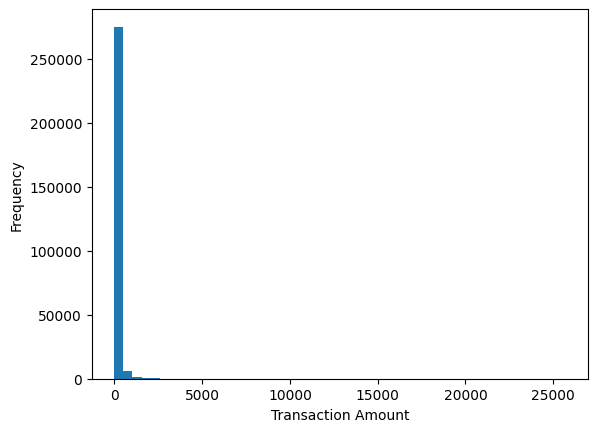

In [12]:
plt.hist(data['Amount'], bins = 50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

The distribution of transaction amounts appears to be highly skewed towards small values.

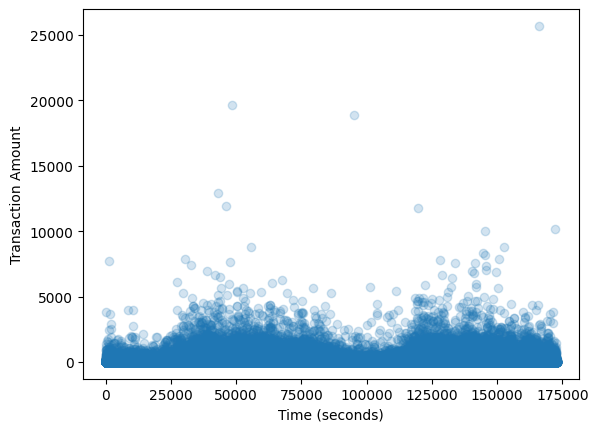

In [13]:
#Scatter plot of the transaction amounts versus the transaction times to see if there is any pattern or trend:
plt.scatter(data['Time'], data['Amount'], alpha=0.2)
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

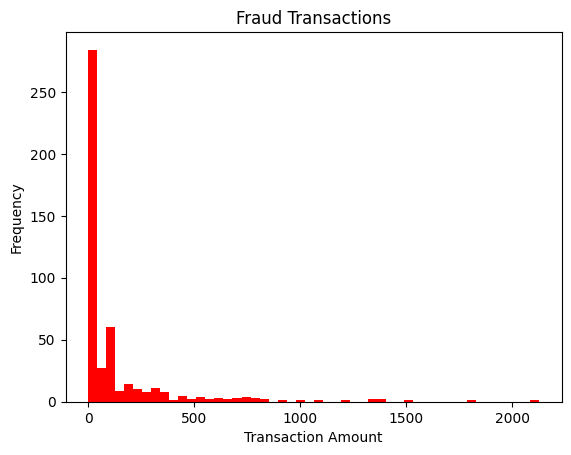

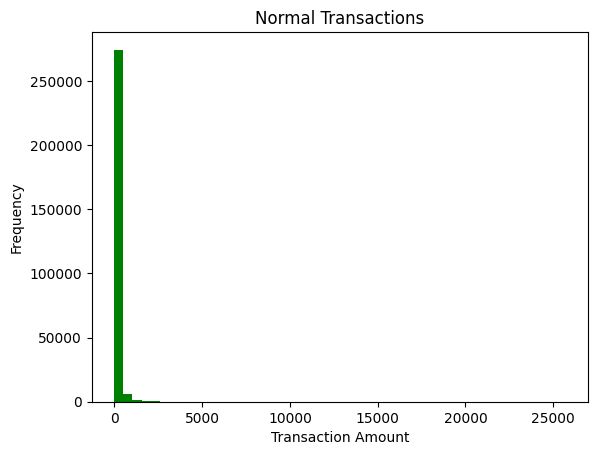

In [14]:
#we can also take a look at these plots for each class seperatly 
#fraud transactions
plt.hist(data[data['Class'] == 1]['Amount'], bins = 50, color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Fraud Transactions')
plt.show()

#normal transactions
plt.hist(data[data['Class'] == 0]['Amount'], bins = 50, color = 'green')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Normal Transactions')
plt.show()

From the plots above we can observe that most of the fraud transactions are with smaller amounts of money and the normal transactions can also have very big amounts associated with them.

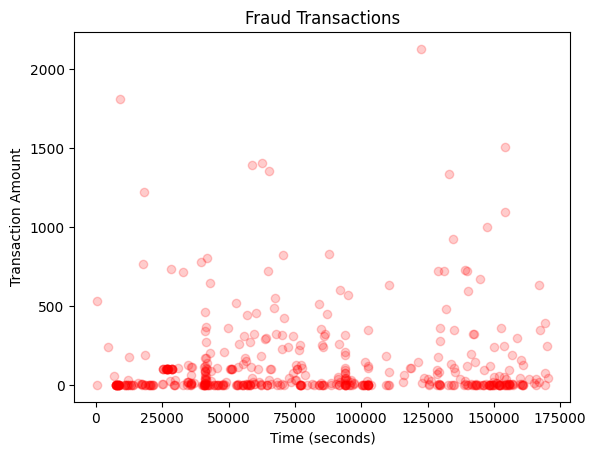

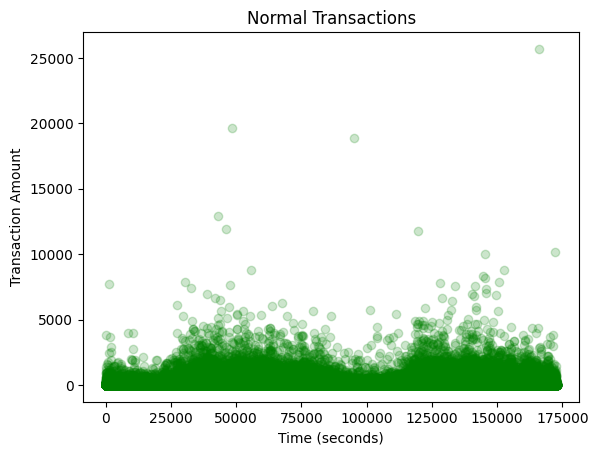

In [15]:
#Scatter plot of the transaction amounts versus the transaction times to see if there is any pattern or trend for each class
#fraud transactions
plt.scatter(data[data['Class'] == 1]['Time'], data[data['Class'] == 1]['Amount'], alpha=0.2, color = 'red')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.title('Fraud Transactions')
plt.show()

#normal transactions
plt.scatter(data[data['Class'] == 0]['Time'], data[data['Class'] == 0]['Amount'], alpha=0.2, color = 'green')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.title('Normal Transactions')
plt.show()

there seems to be no clear pattern between time and transaction amount here

In [16]:
#class distribution
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

as we can see the data class distribution is highly imbalanced so we can try to balance that to achive better performance.

---
## **3. Data Preprocessing and Feature Engineering**

Creating new features and transforming existing ones that may help improve the detection of fraudulent transactions. 

Creating a new feature that represents the hour of the day when the transaction occurred:

In [43]:
#create a new feature called Hour that represents the hour of the day when the transaction occurred.
data['Hour'] = np.floor(data['Time'] / 3600) % 24

In [44]:
data['Hour'].sample(5)

244090    18.0
48307     12.0
100432    18.0
160357     7.0
191075    11.0
Name: Hour, dtype: float64

Most of the features are Normalized before applying PCA and obtain the given data, so we can Normalize the Amount of transaction to achive better results.

In [47]:
from sklearn.preprocessing import StandardScaler

# normalise the amount column
sc = StandardScaler()

data['normAmount'] = sc.fit_transform(np.array(data['Amount']).reshape(-1, 1))

In [50]:
#using MinMax Scaler to Normalize the Amount of transaction
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

data['normAmount'] = ms.fit_transform(np.array(data['Amount']).reshape(-1, 1))

In [51]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.002724


In [52]:
# drop Time and Amount columns as they are not relevant for prediction purpose 
data = data.drop(['Time', 'Amount'], axis = 1)

In [53]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0,0.002724


---
## **4. Model Building**

**Seperating input features and target variable**

In [54]:
#input features
X = data.drop(['Class'], axis = 1)
#target 
y = data['Class']

In [55]:
#Isolation Tree predicts outliers as -1 and others as 1
y_final = []
for i in y:
    if(i == 1):
        y_final.append(-1)
    else:
        y_final.append(1)
        
y_final = pd.Series(y_final)

**Split the data into training and test sets**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size = 0.2, stratify = y_final)

In [57]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [58]:
print("Before Oversampling : ")

print('Class Distribution : ')
print()

print('In train set : ')
print('normal = ', (y_train == 1).sum())
print('fraud = ', (y_train == -1).sum())
print('fraud percentage : ', (y_train == -1).sum() / len(y_train))
print()

print('In test set : ')
print('normal = ', (y_test == 1).sum())
print('fraud = ', (y_test == -1).sum())
print('fraud percentage : ', (y_test == -1).sum() / len(y_test))

Before Oversampling : 
Class Distribution : 

In train set : 
normal =  226602
fraud =  378
fraud percentage :  0.0016653449643140364

In test set : 
normal =  56651
fraud =  95
fraud percentage :  0.0016741268107003137


**Handling Imbalanced class distribution - Using SMOTE (Synthetic Minority Oversampling Technique)**

In [59]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [60]:
print("After Oversampling : ")

print('Class Distribution : ')
print()

print('In train set : ')
print('normal = ', (y_train_res == 1).sum())
print('fraud = ', (y_train_res == -1).sum())
print('fraud percentage : ', (y_train_res == -1).sum() / len(y_train_res))
print()

After Oversampling : 
Class Distribution : 

In train set : 
normal =  226602
fraud =  226602
fraud percentage :  0.5



---
### **Creating Model**

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#### **Isolation Forest Model**

Isolation Forest is a tree-based algorithm that randomly selects a feature and a split point to isolate the anomalies.

In [79]:
from sklearn.ensemble import IsolationForest

# Here, n_estimators is the number of trees in the forest, 
# max_samples is the number of samples to draw from the dataset to train each tree, 
# and contamination is the fraction of outliers in the dataset.
clf = IsolationForest(n_estimators = 50, max_samples = 'auto', contamination = 0.01, random_state = 0)

In [80]:
clf.fit(X_train)

IsolationForest(contamination=0.01, n_estimators=50, random_state=0)

In [82]:
#performance on train set
y_pred_train = clf.predict(X_train)

In [83]:
print('Precision Score : ', precision_score(y_train, y_pred_train))
print('Recall Score : ', recall_score(y_train, y_pred_train))
print('F1 Score : ', f1_score(y_train, y_pred_train))
print('Confusion Matrix : ')
print(confusion_matrix(y_train, y_pred_train))

Precision Score :  0.9993146722442259
Recall Score :  0.990970953477904
F1 Score :  0.9951253235012586
Confusion Matrix : 
[[   224    154]
 [  2046 224556]]


In [93]:
y_pred = clf.predict(X_test)

In [94]:
print('Precision Score : ', precision_score(y_test, y_pred))
print('Recall Score : ', recall_score(y_test, y_pred))
print('F1 Score : ', f1_score(y_test, y_pred))
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred))

Precision Score :  0.9993591341189875
Recall Score :  0.9909445552593953
F1 Score :  0.9951340571681808
Confusion Matrix : 
[[   59    36]
 [  513 56138]]


In [ ]:
#our model seems to have good generalization performance performance

**Fine Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100], 'contamination': [0.01, 0.05]}

grid = GridSearchCV(clf, params, cv = 3, scoring = 'f1')
grid.fit(X_train_res, y_train_res)

In [ ]:
print('Best parameters:', grid.best_params_)
print('Best F1 score:', grid.best_score_)

the best combination of hyperparameters are 'contamination': 0.01, 'n_estimators': 50 and the corresponding F1 score is 0.9951677176864914

we can use the final trained model by grid search to make prediction on the set aside test data to evaluate how well our model generalizes.

In [ ]:
y_pred = grid.predict(X_test)

print('Precision Score : ', precision_score(y_test, y_pred))
print()

print('Recall Score : ', recall_score(y_test, y_pred))
print()

print('F1 Score : ', f1_score(y_test, y_pred))
print()

print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred))

#### **Using Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

# logistic regression object
lr = LogisticRegression(max_iter = 10000)
  
# train the model on train set
lr.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=10000)

In [32]:
y_pred_train2 = lr.predict(X_train)

print("EVALUATION ON TRAIN SET : ")

print('Precision Score : ', precision_score(y_train, y_pred_train2))
print('Recall Score : ', recall_score(y_train, y_pred_train2))
print('F1 Score : ', f1_score(y_train, y_pred_train2))
print('Confusion Matrix : ')
print(confusion_matrix(y_train, y_pred_train2))

EVALUATION ON TRAIN SET : 
Precision Score :  0.9993516002681817
Recall Score :  0.9998367181225232
F1 Score :  0.999594100336632
Confusion Matrix : 
[[   231    147]
 [    37 226565]]


In [33]:
y_predictions = lr.predict(X_test)

print("EVALUATION ON TEST SET : ")

print('Precision Score : ', precision_score(y_test, y_predictions))
print('Recall Score : ', recall_score(y_test, y_predictions))
print('F1 Score : ', f1_score(y_test, y_predictions))
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_predictions))

EVALUATION ON TEST SET : 
Precision Score :  0.9991885694125948
Recall Score :  0.9998764364265414
F1 Score :  0.9995323845739847
Confusion Matrix : 
[[   49    46]
 [    7 56644]]


#Logistic regression performs better than Isolation Forest Approach

**Using SMOTE Balanced Dataset for training**

In [34]:
# logistic regression object
lr2 = LogisticRegression(max_iter = 10000)
  
# train the model on train set
lr2.fit(X_train_res, y_train_res.ravel())

LogisticRegression(max_iter=10000)

In [35]:
y_pred_train3 = lr2.predict(X_train_res)

print("EVALUATION ON TRAIN SET : ")

print('Precision Score : ', precision_score(y_train_res, y_pred_train3))
print('Recall Score : ', recall_score(y_train_res, y_pred_train3))
print('F1 Score : ', f1_score(y_train_res, y_pred_train3))
print('Confusion Matrix : ')
print(confusion_matrix(y_train_res, y_pred_train3))

EVALUATION ON TRAIN SET : 
Precision Score :  0.9323992330545079
Recall Score :  0.9764388663824679
F1 Score :  0.9539110209589422
Confusion Matrix : 
[[210560  16042]
 [  5339 221263]]


In [36]:
y_predictions2 = lr2.predict(X_test)

print("EVALUATION ON TEST SET : ")

print('Precision Score : ', precision_score(y_test, y_predictions2))
print('Recall Score : ', recall_score(y_test, y_predictions2))
print('F1 Score : ', f1_score(y_test, y_predictions2))
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_predictions2))

EVALUATION ON TEST SET : 
Precision Score :  0.9997287914949012
Recall Score :  0.9760286667490424
F1 Score :  0.9877365821416769
Confusion Matrix : 
[[   80    15]
 [ 1358 55293]]


Using the Logistic Regression Approach we achive better results than Isolated Forest in terms of Precision, Recall and F1-score.

By Handling the Imbalanced class distribution with SMOTE we are able to get better precision score in exchange of recall score.
But since we want Normal transactions not be marked as fraud unnessarily we will go with the original Logistic Regression which is able to capture a lot of fraud transactions and does not cause much trouble and inconvinece to casual customers.

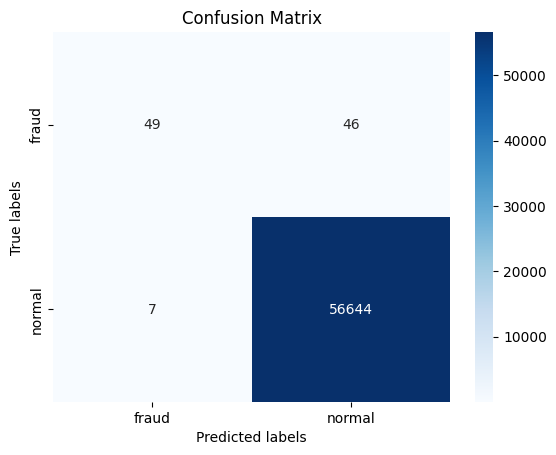

In [39]:
#Generalization Performance of our final Model

ax= plt.subplot()
cm = confusion_matrix(y_test, y_predictions)
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fraud', 'normal']); ax.yaxis.set_ticklabels(['fraud', 'normal']);

**Using Logistic regression Using Amount Feature Normalized using MinMax Scaler instead of Standard Scaler**

In [62]:
from sklearn.linear_model import LogisticRegression

# logistic regression object
lr4 = LogisticRegression(max_iter = 10000)
  
# train the model on train set
lr4.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=10000)

In [63]:
y_pred_train4 = lr4.predict(X_train)

print("EVALUATION ON TRAIN SET : ")

print('Precision Score : ', precision_score(y_train, y_pred_train4))
print('Recall Score : ', recall_score(y_train, y_pred_train4))
print('F1 Score : ', f1_score(y_train, y_pred_train4))
print('Confusion Matrix : ')
print(confusion_matrix(y_train, y_pred_train4))

EVALUATION ON TRAIN SET : 
Precision Score :  0.9993912901561032
Recall Score :  0.9998631962648167
F1 Score :  0.9996271875158556
Confusion Matrix : 
[[   240    138]
 [    31 226571]]


In [64]:
y_predictions4 = lr4.predict(X_test)

print("EVALUATION ON TEST SET : ")

print('Precision Score : ', precision_score(y_test, y_predictions4))
print('Recall Score : ', recall_score(y_test, y_predictions4))
print('F1 Score : ', f1_score(y_test, y_predictions4))
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_predictions4))

EVALUATION ON TEST SET : 
Precision Score :  0.9992766280280174
Recall Score :  0.9997705247921485
F1 Score :  0.9995235153975117
Confusion Matrix : 
[[   54    41]
 [   13 56638]]


Using MinMax Scaler


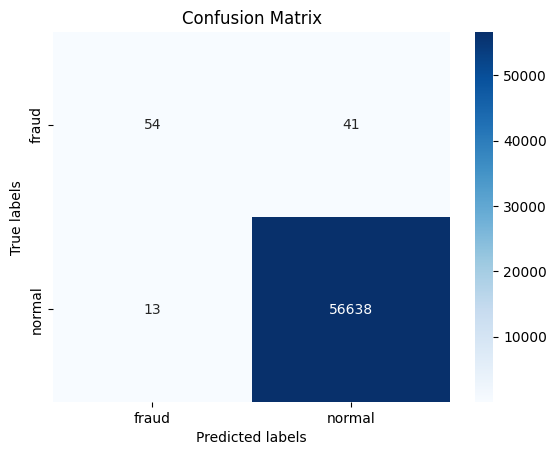

In [66]:
#Generalization Performance of our final Model
print("Using MinMax Scaler")
ax= plt.subplot()
cm = confusion_matrix(y_test, y_predictions4)
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fraud', 'normal']); ax.yaxis.set_ticklabels(['fraud', 'normal']);

### **Final Results - Model Selection**

Out of all the Algorithms to detect the fraud transactions, **Logistic regression** with MinMax Scaler applied to Amount of transaction is the one that provides the best generalization performance as it is able to detect most of the fraud transactions and also does not classify many normal transactions as fraud which is important because we don't want many day to day transactions to be interupted.

## **5. Export the Trained Model for Deployement**

We can train the Final Model on all the available data and save the model object as a Pickle (Byte) File so we can deploy it and make new predictions in future

In [70]:
lr4.fit(X, y.ravel())

LogisticRegression(max_iter=10000)

In [71]:
y_pred_final = lr4.predict(X)

print("EVALUATION ON TRAIN SET : ")

print('Precision Score : ', precision_score(y, y_pred_final))
print('Recall Score : ', recall_score(y, y_pred_final))
print('F1 Score : ', f1_score(y, y_pred_final))
print('Confusion Matrix : ')
print(confusion_matrix(y, y_pred_final))

EVALUATION ON TRAIN SET : 
Precision Score :  0.8727272727272727
Recall Score :  0.6088794926004228
F1 Score :  0.7173100871731009
Confusion Matrix : 
[[283211     42]
 [   185    288]]


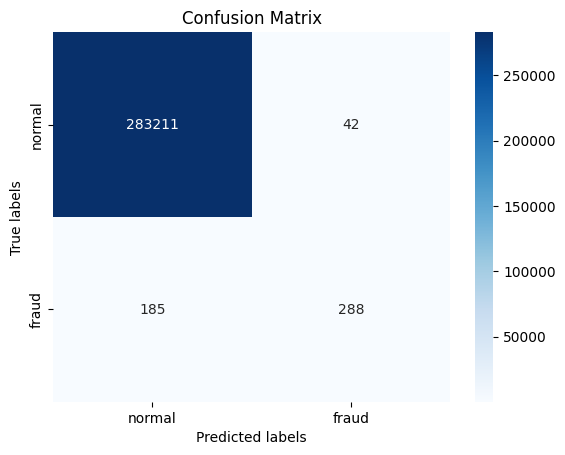

In [72]:
ax = plt.subplot()
cm_final = confusion_matrix(y, y_pred_final)
sns.heatmap(cm_final, annot = True, fmt = 'g', ax = ax, cmap = 'Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['normal', 'fraud']); ax.yaxis.set_ticklabels(['normal', 'fraud']);

In [73]:
import pickle 

#save the final model object as byte (Pickle) file
pickle.dump(lr4, open('FraudDetectionModel.pkl', 'wb'))